In [1]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
import warnings
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
#from costcla.models import CostSensitiveDecisionTreeClassifier
#from costcla.metrics import savings_score
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve
from collections import Counter
from collections import defaultdict
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#Importing the dataset 
df=pd.read_csv("/home/umair/Desktop/Data Science and BI/data mining/occupancy_data/DataCleaned.csv")
test=pd.read_csv("/home/umair/Desktop/Data Science and BI/data mining/occupancy_data/DataCleanedTest.csv")


In [3]:
#Drop the useless column
df.drop(['Unnamed: 0'], axis=1, inplace =True)
df.drop(['date'], axis=1, inplace =True)
df.drop(['DayName'], axis=1, inplace =True)

test.drop(['Unnamed: 0'], axis=1, inplace =True)
test.drop(['date'], axis=1, inplace =True)
test.drop(['DayName'], axis=1, inplace =True)

In [4]:
#preparing the two datasets splitting the attributes with the class 
attributes = [col for col in df.columns if 
              col == 'IsWorkDay' 
              or col == 'Hour' 
              or col == 'Light'
              or col == 'IsWorkHour'
              or col == 'Temperature' 
              or col == 'Humidity'
              or col == 'CO2'
              or col == 'HumidityRatio'
             ]
X_train = df[attributes].values
y_train = df['Occupancy']

attributes = [col for col in df.columns if 
              col == 'IsWorkDay' 
              or col == 'Hour' 
              or col == 'Light'
              or col == 'IsWorkHour'
              or col == 'Temperature' 
              or col == 'Humidity'
              or col == 'CO2'
              or col == 'HumidityRatio'
             ]
X_test = test[attributes].values
y_test = test['Occupancy']

In [5]:
#Try the classification using the ORIGINAL decision tree with the ORIGINAL prepared dataset
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

clfG = KNeighborsClassifier(n_neighbors=1, weights='uniform')

clfG.fit(X_train, y_train)
y_predG = clfG.predict(X_test)
y_predGproba = clfG.predict_proba(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_predG))
print('F1-score %s' % f1_score(y_test, y_predG, average=None))
print(classification_report(y_test, y_predG))
confusion_matrix(y_test, y_predG)

Accuracy 0.9977485928705441
F1-score [0.99822485 0.99692308]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1693
           1       0.99      1.00      1.00       972

    accuracy                           1.00      2665
   macro avg       1.00      1.00      1.00      2665
weighted avg       1.00      1.00      1.00      2665



array([[1687,    6],
       [   0,  972]])

In [6]:
#Print the REAL roc value
lb = LabelBinarizer()
lb.fit(y_test)
lb.classes_.tolist()
fpr, tpr, _ = roc_curve(y_test, y_predG)
roc_auc = auc(fpr, tpr)
print(roc_auc)

roc_auc = roc_auc_score(y_test, y_predG, average=None)

0.9982279976373302


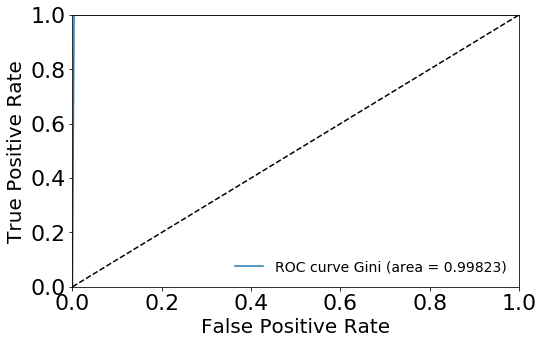

In [7]:
#Plotting the graph of the REAL Roc curve
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label='ROC curve Gini (area = %0.5f)' % roc_auc)
#plt.plot(fprE, tprE, label='ROC curve Gain (area = %0.5f)' % (roc_aucE))
#plt.plot(fprRF, tprRF, label='ROC curve Random Forest (area = %0.5f)' % (roc_aucRF))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

In [8]:
#Reducing the dataset to two attributes
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_train)

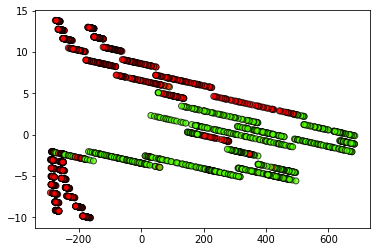

In [9]:
#Plot the dataset with 2 attributes
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [10]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 972, 1: 972})


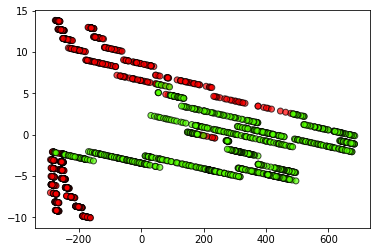

In [11]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [12]:
clfRU = KNeighborsClassifier(n_neighbors=1, weights='uniform')
clfRU.fit(X_res, y_res)
y_predRU = clfRU.predict(X_test)
y_predRUproba = clfRU.predict_proba(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_predRU))
print('F1-score %s' % f1_score(y_test, y_predRU, average=None))
print(classification_report(y_test, y_predRU))
confusion_matrix(y_test, y_predRU)

Accuracy 0.9782363977485928
F1-score [0.98257212 0.97102897]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.94      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665



array([[1635,   58],
       [   0,  972]])

In [13]:
#Print the roc value RANDOM UNDERSAMPLING
lb = LabelBinarizer()
lb.fit(y_test)
lb.classes_.tolist()
fpr, tpr, _ = roc_curve(y_test, y_predRU)
roc_aucRU = auc(fpr, tpr)
print(roc_aucRU)

roc_aucRU = roc_auc_score(y_test, y_predRU, average=None)

0.9828706438275251


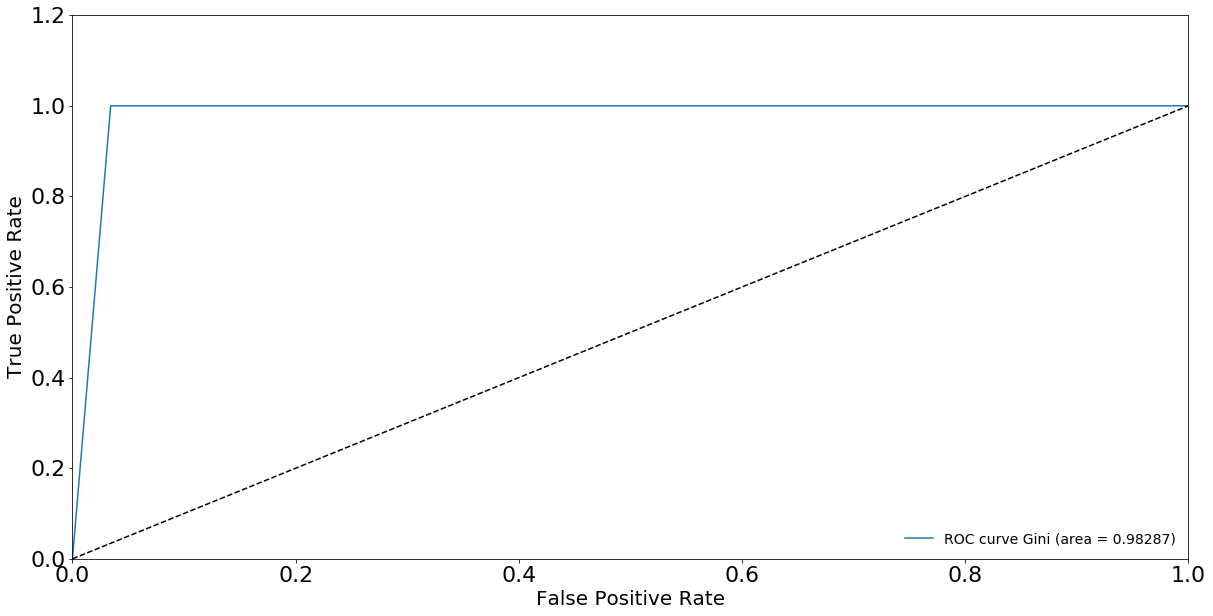

In [14]:
#Plotting the graph of the  Roc curve RANDOM UNDERSAMPLING
plt.figure(figsize=(20, 10))
plt.plot(fpr, tpr, label='ROC curve Gini (area = %0.5f)' % roc_aucRU)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.2])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

In [15]:
warnings.simplefilter("ignore")

In [16]:
#cnn = CondensedNearestNeighbour(random_state=42, n_jobs=5)
#X_res, y_res = cnn.fit_resample(X_train, y_train)
#print('Resampled dataset shape %s' % Counter(y_res))

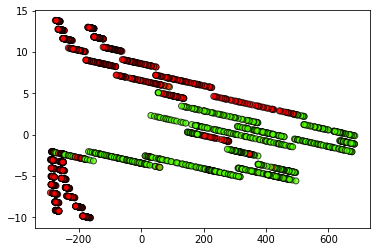

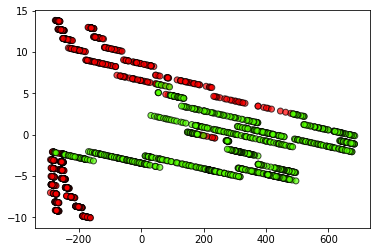

In [17]:
X_pca = pca.transform(X_train)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [18]:
#See the accuracy with the different values of n_jobs
accuracy = []
error= []
for count in range(5,16):
    cnn = CondensedNearestNeighbour(random_state=42, n_jobs=count)
    X_res, y_res = cnn.fit_resample(X_train, y_train)
    print('Resampled dataset shape %s' % Counter(y_res))
    clfCNN = KNeighborsClassifier(n_neighbors=1, weights='uniform')
    clfCNN.fit(X_res, y_res)
    y_predCNN = clfCNN.predict(X_test)
    print('n_jobs= %s' % count)
    print('Accuracy %s' % accuracy_score(y_test, y_predCNN))
    print('F1-score %s' % f1_score(y_test, y_predCNN, average=None))
    accuracy.append(accuracy_score(y_test, y_predCNN))

Resampled dataset shape Counter({1: 972, 0: 151})
n_jobs= 5
Accuracy 0.9939962476547842
F1-score [0.99525223 0.99183673]
Resampled dataset shape Counter({1: 972, 0: 151})
n_jobs= 6
Accuracy 0.9939962476547842
F1-score [0.99525223 0.99183673]
Resampled dataset shape Counter({1: 972, 0: 151})
n_jobs= 7
Accuracy 0.9939962476547842
F1-score [0.99525223 0.99183673]
Resampled dataset shape Counter({1: 972, 0: 151})
n_jobs= 8
Accuracy 0.9939962476547842
F1-score [0.99525223 0.99183673]
Resampled dataset shape Counter({1: 972, 0: 151})
n_jobs= 9
Accuracy 0.9939962476547842
F1-score [0.99525223 0.99183673]
Resampled dataset shape Counter({1: 972, 0: 151})
n_jobs= 10
Accuracy 0.9939962476547842
F1-score [0.99525223 0.99183673]
Resampled dataset shape Counter({1: 972, 0: 151})
n_jobs= 11
Accuracy 0.9939962476547842
F1-score [0.99525223 0.99183673]
Resampled dataset shape Counter({1: 972, 0: 151})
n_jobs= 12
Accuracy 0.9939962476547842
F1-score [0.99525223 0.99183673]
Resampled dataset shape Count

Text(0, 0.5, 'Accuracy')

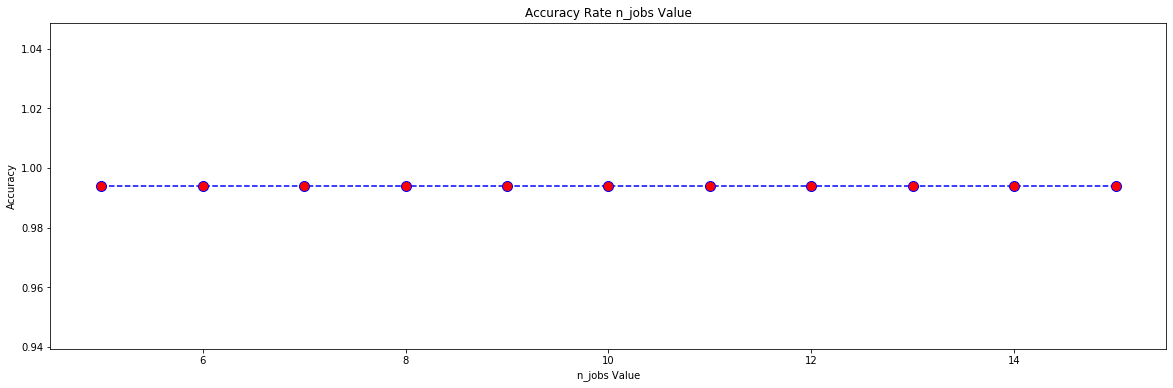

In [19]:
#Graph of the variation of the accuracy at the variation of K
plt.figure(figsize=(20, 6))
plt.plot(range(5, 16), accuracy, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate n_jobs Value')
plt.xlabel('n_jobs Value')
plt.ylabel('Accuracy')

In [20]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 1693, 0: 1693})


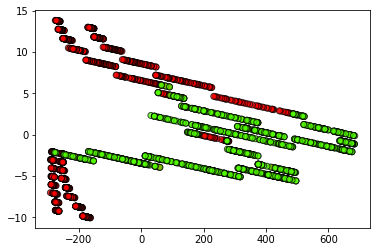

In [21]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

Accuracy 0.9977485928705441
F1-score [0.99822485 0.99692308]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1693
           1       0.99      1.00      1.00       972

    accuracy                           1.00      2665
   macro avg       1.00      1.00      1.00      2665
weighted avg       1.00      1.00      1.00      2665



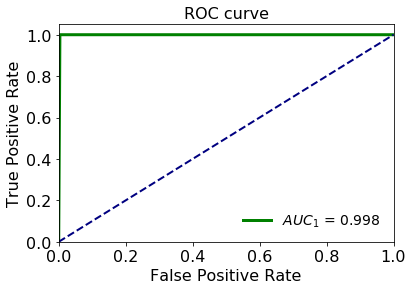

In [22]:
clf = KNeighborsClassifier(n_neighbors=1, weights='uniform')
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [23]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 1693, 0: 1693})


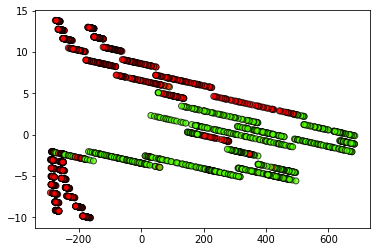

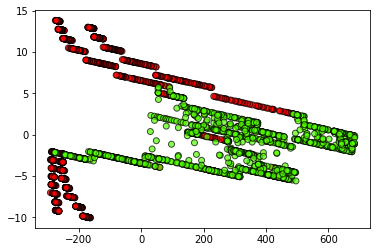

In [24]:
X_pca = pca.transform(X_train)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

Accuracy 0.9977485928705441
F1-score [0.99822485 0.99692308]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1693
           1       0.99      1.00      1.00       972

    accuracy                           1.00      2665
   macro avg       1.00      1.00      1.00      2665
weighted avg       1.00      1.00      1.00      2665



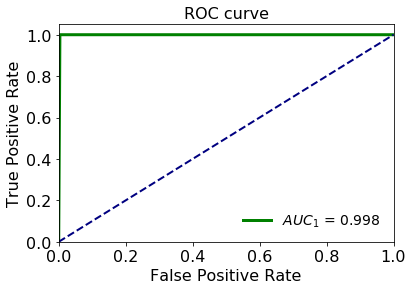

In [25]:
clf = KNeighborsClassifier(n_neighbors=1, weights='uniform')
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

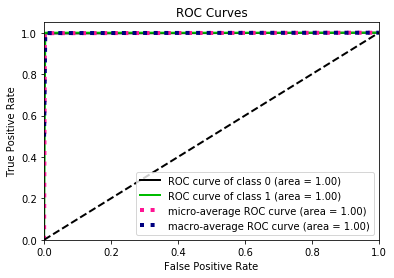

In [27]:
plot_roc(y_test, y_score)
plt.show()

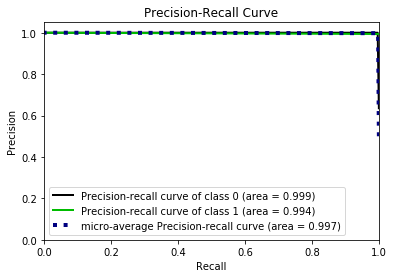

In [28]:
plot_precision_recall(y_test, y_score)
plt.show()

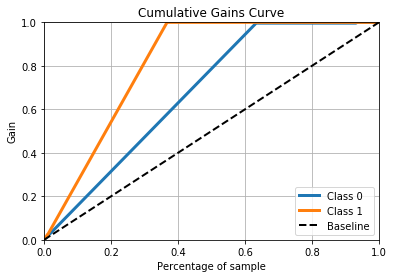

In [29]:
plot_cumulative_gain(y_test, y_score)
plt.show()

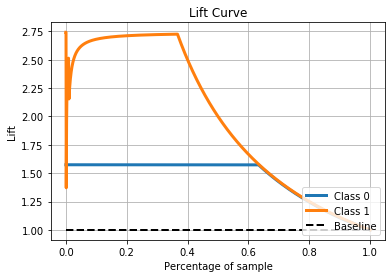

In [30]:
plot_lift_curve(y_test, y_score)
plt.show()